In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
import mglearn
from sklearn.decomposition import PCA,NMF
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_lfw_people

# PCA

주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술입니다. 
회전한 뒤에 데이터를 설명하는데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택됩니다.

### 인위적 데이터에 PCA 적용하기 

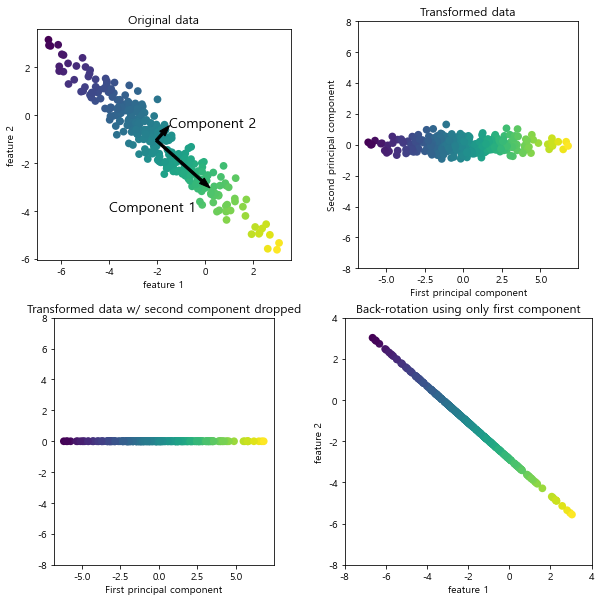

In [2]:
mglearn.plots.plot_pca_illustration()

첫번째 그래프(좌상단)는 원본 데이터 포인트를 색으로 구분해 표시한 것 입니다. 이 알고리즘은 먼저 '성분 1' 이라고 쓰여 있는, 분산이 가장 큰 방향을 찾습니다. 이 방향(또는 벡터)이 데이터에서 가장 많은 정보를 담고 있는 방향입니다.(특성들의 상관 관계가 가장 큰 방향)

그 다음으로, 이 알고리즘은 첫번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾습니다. 2차원에서는 가능한 직각 방향이 하나뿐이지만 고차원에서는 (무한히) 많은 직각 방향이 있을 수 있습니다. 두 성분을 화살표로 나타냈지만, 사실 화살표의 머리와 꼬리는 아무 의미가 없습니다. 즉 화살표를 중앙에서 오른쪽 아래로 향하게 그리지 않고 왼쪽 위로 향하게 그릴 수도 있습니다. 

이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 주성분이라고 합니다. 일반적으로 원본 특성 개수만큼에 주성분이 있습니다.

두번째 그래프(우상단)는 같은 데이터지만 주성분 1과 2를 각각 x축과 y축에 나란하도록 회전한 것입니다. 회전하기 전에데이터에서 평균을 빼서 중심을 원점에 맞췄습니다. PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬이 대각선 방향을 제외하고는 0이 됩니다.

PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있습니다. 이 예에서는 세번째 그래프(좌하단)처럼 첫번째 주성분만 유지하려고 합니다. 이렇게 하면 2차원 데이터셋이 1차원 데이터 셋으로 차원이 감소합니다. 그러나 단순히 원본 특성 중 하나만 남기는 것은 아닙니다. 가장 유용한 방향을 찾아서 그 방향의 성분, 즉 첫번째 주성분을 유지하는 것입니다.(첫번째 그래프에서 오른쪽 아래로 향하는 성분)

마지막으로 데이터에 다시 평균을 더하고 반대로 회전시킵니다. 이 결과가 마지막 그래프(우하단)입니다. 이 데이터 포인트들은 원래 특성 공간에 놓여 있지만 첫번째 주성분의 정보만 담고 있습니다. 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화하는데 종종 사용합니다.   

### PCA 얼굴 분석

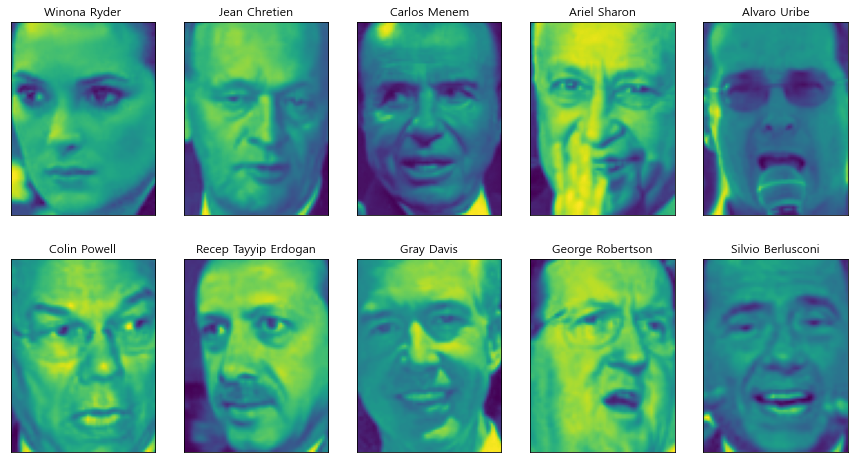

In [3]:
#얼굴 데이터 가져오기
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape= people.images[0].shape

fig,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})

for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

plt.show()

In [4]:
#데이터셋 편중 없애기 (50개만 추출)
mask = np.zeros(people.target.shape,dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
    
x_people = people.data[mask]
y_people = people.target[mask]

#0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정하기
#MinMaxScaler를 적용하는 것과 거의 같습니다.
x_people = x_people/255

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x_people,y_people,stratify=y_people,random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

print('테스트 세트 정확도:{:.2f}'.format(knn.score(x_test,y_test)))

테스트 세트 정확도:0.23


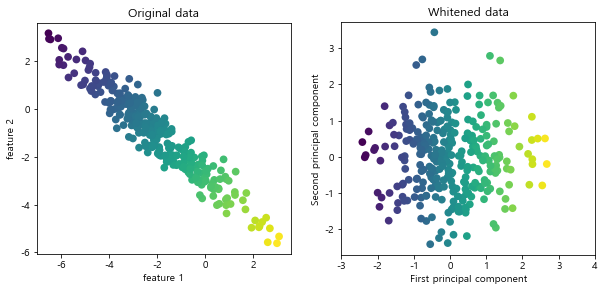

In [6]:
mglearn.plots.plot_pca_whitening()
#PCA의 백색화 옵션

화이트닝 옵션을 사용해 주성분의 스케일이 같아지도록 조정, 이는 화이트닝 옵션없이 변환한 후에 Standard Scaler를 사용하는 것과 같은 효과. 

화이트닝 옵션으로 데이터가 회전하는 것 뿐만 아니라 스케일도 조절되어 그래프가 (타원이아닌) 원 모양으로 바뀌었습니다. 

In [7]:
#PCA 객체를 훈련 데이터로 학습시켜처음 100개의 주성분을 추춯해 변환 
pca = PCA(n_components=100,whiten=True,random_state=0).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [8]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_pca,y_train)
print('테스트 세트 정확도:{:.2f}'.format(knn.score(x_test_pca,y_test)))

테스트 세트 정확도:0.31


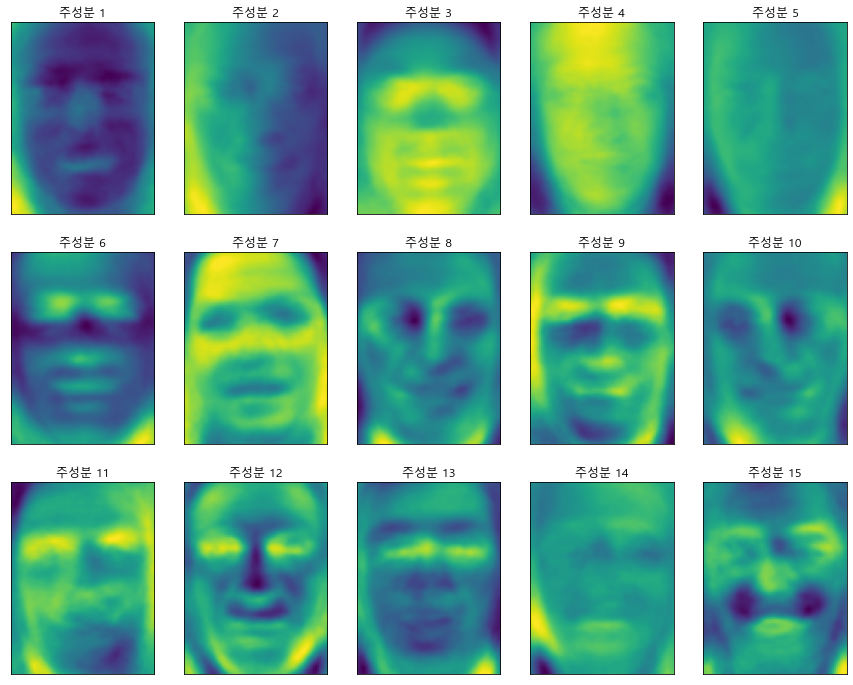

In [9]:
fig,axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})

for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))
    
plt.show()

### PCA 모델 원본 데이터 재구성해보기

PCA 모델을 이해하는 또 다른 방법은 몇 개의 주성분을 사용해 원본 데이터를 재구성해보는 것입니다.
원래 특성 공간으로 되돌리는 작업은 inverse_transform 메서드를 사용합니다.

### 산점도에 나타내기

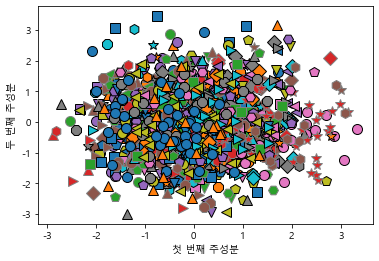

In [10]:
mglearn.discrete_scatter(x_train_pca[:,0],x_train_pca[:,1],y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel('두 번째 주성분')
plt.show()

## note

각 주성분은 원본 데이터셋의 한 방향이므로 각 주성분이 얼만큼의 분산을 표현하는지 비교해 볼 수 있습니다. 이를 설명된 분산의 비율이라고 합니다.

scikit-learn의 PCA 클래스는 explaned_variance_ratio_ 속성으로 각 주성분의 설명된 분산의 비율을 제공합니다. 

In [11]:
#앞에서 얼굴 데이터셋에 훈련한 PCA 객체의 설명된 분산의 비율을 모두 더해 보겠습니다.
np.sum(pca.explained_variance_ratio_)

0.90277517

결과에서 보듯이 100개의 주성분으로 표현할 수 있는 얼굴 데이터셋의 분산은 약 90%입니다.

주성분은 가장 큰 분산의방향을 차례대로 찾기 때문에 맨 처음 찾은 주성분ㅇ이 재구성에 기여하는 정도가 가장 크고 나중으로 갈수록 작습니다. 

따라서 적절한 주성분의 개수를 찾으려면 설명된 분산을 누적한 그래프를 그리면 도움이 됩니다.

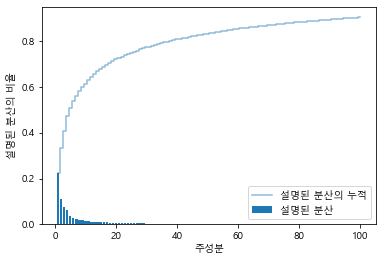

In [12]:
plt.bar(range(1,101),pca.explained_variance_ratio_,align='center',label='설명된 분산')
plt.step(range(1,101),np.cumsum(pca.explained_variance_ratio_),alpha=0.5,where='mid',label='설명된 분산의 누적')
plt.ylabel("설명된 분산의 비율")
plt.xlabel("주성분")
plt.legend()
plt.show()

설명된 분산의 누적 그래프를 보면 대략 30번째 주성분 이후에는 설명된 분산이 크게 줄어드는 것을 볼 수 있습니다. 주성분 40개 정도만 선택하더라도 약 80%의 분산을 표현할 수 있습니다.

PCA 클래스에 주성분을 40개로 지정하여 다시 훈현하고 변환된 데이터를 사용해 앞서 사용한 K-최근접 이웃 모델로 성능을 확인해 보겠습니다.

In [13]:
pca = PCA(n_components=40,whiten=True,random_state=0).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

knn.fit(x_train_pca,y_train)
print('테스트 세트 정확도:{:.2f}'.format(knn.score(x_test_pca,y_test)))

테스트 세트 정확도:0.32


주성분 개수를 100개에서 40개로 줄였지만 테스트 세트에 대한 성능은거의 동일합니다.
이는 41번째에서 100번째까지 주성분이 분류 작업에 큰 도움이 되지 않는다는 뜻입니다.

PCA 클래스의 n_components 매개변수에는 주성분 개수 대신 분산의 비율을 0~1 사이 실수로 지정할 수도 있습니다. 

다음은 80% 분산 비율에 해당하는 주성분을 찾도록 지정하는 예입니다.

찾은 주성분 개수는 n_components_ 속성에 저장됩니다.

In [14]:
pca = PCA(n_components=0.8,whiten=True,random_state=0).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

knn.fit(x_train_pca,y_train)
print('테스트 세트 정확도:{:.2f}'.format(knn.score(x_test_pca,y_test)))
print('주성분 개수:',pca.n_components_)

테스트 세트 정확도:0.30
주성분 개수: 38


# NMF

NMF는 유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘입니다.
이 알고리즘은 PCA와 비슷하고 차원축소에도 사용할 수 있습니다.

PCA에서는 데이터의 분산이 가장 크고 수직인 성분을 찾았다면, NMF에서는 음수가 아닌 성분과 계수 값을 찾습니다.
즉, 주성분과 계수가 모두 0보다 크거나 같아야 합니다.
음수가 아닌 주성분과 계수의 가중치 합은 음수가 되지 않으므로 당연하게 이방식은 음수가 아닌 특성을 가진 데이터에만 적용할 수 있습니다.

음수가 아닌 가중치 합으로 데이터를 분해하는 기능은 여러 사람의 목소리가담긴 오디오 트랙이나 여러 악기로 이뤄진 음악처럼 독립된 소스를 추가하여(덮어써서) 만들어진 데이터에 특히 유용합니다. 이럴때 NMF는 섞여있는 데이터에서 원본 성분을 구분할 수 있습니다.
음수로 된 성분이나 계수가 만드는 상쇄 효과를 이해하기 어려운 PCA보다 대체로 NMF의 주성분이 해석하기 쉽습니다.

### 인위적 데이터에 NMF 적용하기 

PCA를 사용할 때와는 달리 NMF로 데이터를 다루려면 주어진 데이터가 양수인지 확인해야 합니다.
이 말은 데이터가 원점 (0,0)에서 상대적으로 어디에 놓여 있는지가 NMF에서는 중요하다는 뜻입니다.
그렇기 때문에 원점 (0,0)에서 데이터로 가는 방향을 추출한 것으로 음수 미포함 성분을 이해할 수 있습니다.

C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


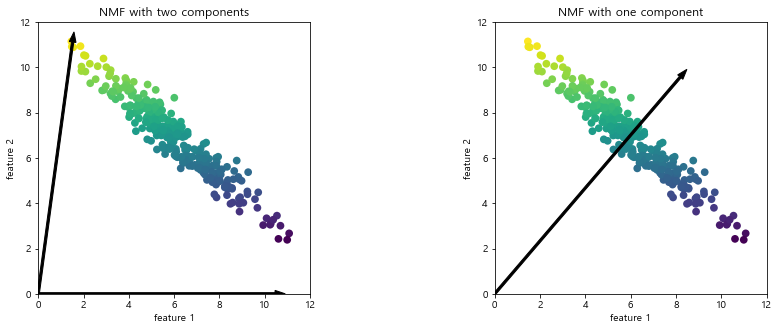

In [15]:
#2차원 예제 데이터에 NMF를 적용한 결과를 보여줍니다.
#왼쪽은 NMF로 찾은 성분이 2개 오른쪽은 1개
mglearn.plots.plot_nmf_illustration()

왼쪽은 성분이 두개인 NMF로 데이터셋의 모든 포인트를 양수로 이뤄진 두개의 성분으로 표현할 수 있습니다.
데이터를 완벽하게 재구성할 수 있을 만큼 성분이 아주 많다면(특성 개수만큼 많다면), 알고리즘은 데이터의 각 특성의 끝에 위치한 포인트를 가리키는 방향을 선택할 것입니다.

하나의 성분만을 사용한다면 NMF는 데이터를 가장 잘 표현할 수 있는 평균으로 향하는 성분을 만듭니다. PCA와는 반대로성분 개수를 줄이면 특정 방향이 제거되는 것뿐만아니라 전체 성분이 완전히 바뀝니다. 
NMF에서 성분은 특정 방식으로 정렬되어 있지도 않아서 "첫 번쨰 비음수 성분" 같은 것이 없습니다.
즉 모든 성분을 동등하게 취급합니다.

NMF는 무작위로초기화하기 때문에 난수 생성 초깃값에 따라 결과가 달라집니다. 두 개의 성분으로 모든 데이터를 완벽하게 나타낼 수 있는 이런 간단한 예에서는 난수가 거의 영향을 주지 않습니다.(성분의 크기나 순서는 바뀔수 있습니다) 하지만 복잡한 경우에는 큰 차이를 만들 수 있습니다.    

### 얼굴 이미지에 NMF 적용하기

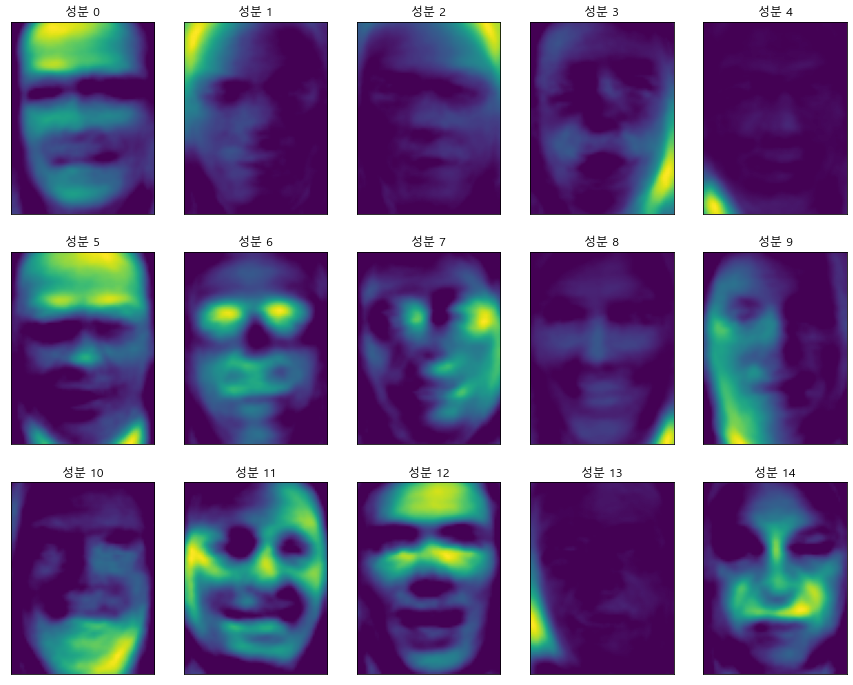

In [16]:
#성분 15개 뽑기
nmf = NMF(n_components=15,init='nndsvd',random_state=0,max_iter=1000,tol=1e-2)
nmf.fit(x_train)
x_train_nmf=nmf.transform(x_train)
x_tesr_nmf=nmf.transform(x_test)

fig,axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})

for i , (component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

plt.show()

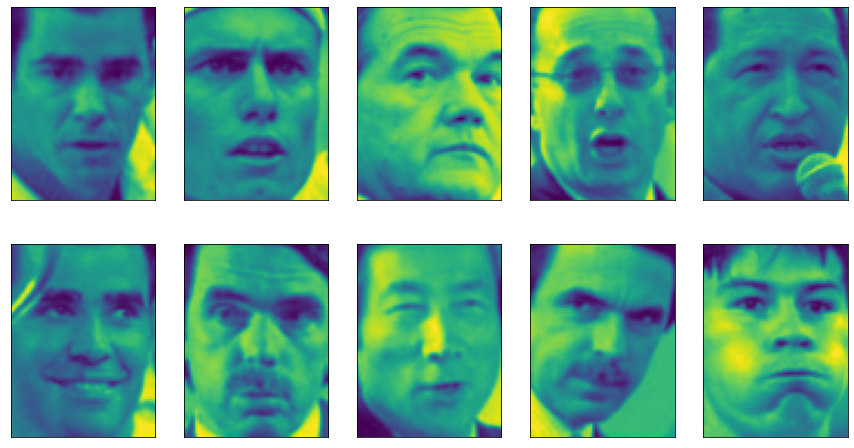

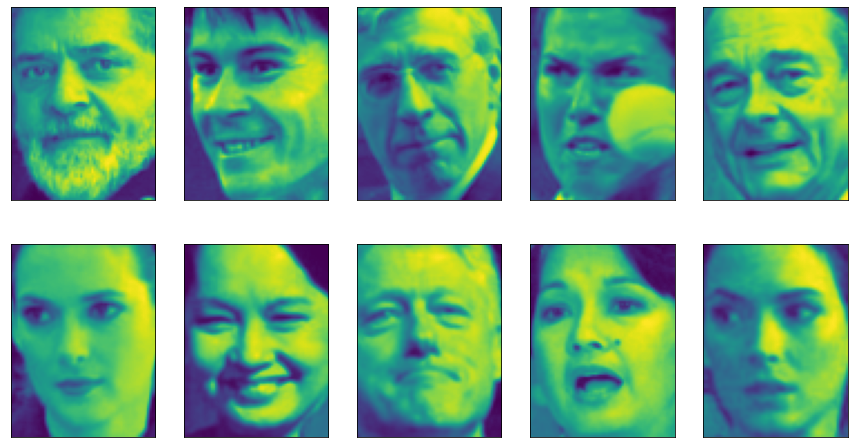

In [17]:
compn=3
#4번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다. 

inds = np.argsort(x_train_nmf[:,compn])[::-1]
fig,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i , (ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(x_train[ind].reshape(image_shape))    
    
compn=7
#8번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다. 

inds = np.argsort(x_train_nmf[:,compn])[::-1]
fig,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i , (ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(x_train[ind].reshape(image_shape))
plt.show()  

성분 7에 대한 계수 값이 큰 얼굴들은 왼쪽으로 돌아가 있고 성분 3에 대한 계수 값이 큰 얼굴들은 오른쪽으로 돌아가 있습니다.

다음은 세 개의 서로 다른 입력으로부터 합성된 신호입니다.

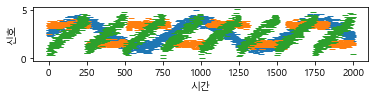

In [18]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'_')
plt.xlabel('시간')
plt.ylabel('신호')
plt.show()

우리는 원본 신호는 볼 수 없고 이 세 개가 섞인 신호만 관찰할 수 있는 상황입니다.
그래서 합쳐진 신호를 분해해서 원본 신호를 복원해야 합니다.
이 신호를 여러 방법으로 (예컨대 100개의 측정 장치로) 관찰할 수 있고 각 장치는 일련의 측정 데이터를 제공한다고 가정합니다. 

In [19]:
#원본 데이터를 사용해 100개의 측정 데이터를 만듭니다

A=np.random.RandomState(0).uniform(size=(100,3))
x=np.dot(S,A.T)
print('측정 데이터 형태:',x.shape)

측정 데이터 형태: (2000, 100)


NMF를 사용해 세개의 신호를 복원합니다

In [20]:
nmf = NMF(n_components=3,init='nndsvd',random_state=42,max_iter=1000,tol=1e-2)
S_ = nmf.fit_transform(x)
print('복원한 신호 데이터 형태:',S_.shape)

복원한 신호 데이터 형태: (2000, 3)


비교를 위해 PCA도 적용합니다.

In [21]:
pca = PCA(n_components=3)
H = pca.fit_transform(x)

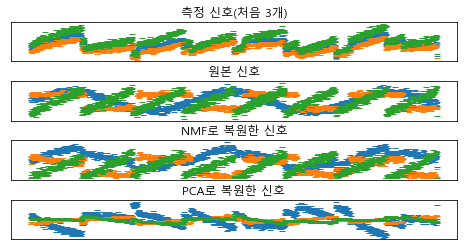

In [22]:
models =[x,S,S_,H]
names = ['측정 신호(처음 3개)','원본 신호','NMF로 복원한 신호','PCA로 복원한 신호']

fig,axes = plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':.5},subplot_kw={'xticks':(),'yticks':()})

for model, name, ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'_')
plt.show()

참고를위해 X에담긴 측정 데이터 100개 중 처음 3개를 함께 그래프로 나타냈습니다.
그래프에서 볼 수 있듯이 NMF는 원본 신호를 잘 복원했지만 PCA는 실패했고 데이터 변동의 대부분을 첫 번째 성분을 사용해 나타냈습니다.

NMF로 생성한 성분은 순서가 없음에 유념해야 합니다.

이 예에서는 NMF 성분의 순서가 원본 신호와 같지만, 순전히 우연일 뿐 입니다.(세 커브의 겹쳐진 순서를 잘 확인해보기)

PCA나 NMF처럼 데이터 포인트를 일정 개수의 성분을 사용해 가중치 합으로 분해할 수 있는 알고리즘이 많이 있습니다.

패턴 추출에 관심이 있다면 독립 성분 분석(ICA), 요인 분석(FA),희소코딩(딕셔너리 학습)에 관해 설명하고 있는 scikit-learn 사용자 가이드의 분해 메서드 페이지를 살펴보는 것을 추천합니다.

(http://scikit-learn.org/stable/modules/decomposition.html)